In [2]:
using NonlinearSolve
using DifferentialEquations
using Plots

In [3]:
function lvNonLinear(u, p)
    x, y = u
    α, β, γ, δ = p
    
    return [
        α * x - β * x * y,
        -γ * y + δ * x * y
    ]
end

function lvODE!(du, u, p, t)
    x, y = u
    α, β, γ, δ = p
    
    du[1] = α * x - β * x * y
    du[2] = -γ * y + δ * x * y
end

lvODE! (generic function with 1 method)

In [4]:
u0 = [10, 10]
p = [1.1, 0.4, 0.4, 0.1]
tspan = (0.0,100.0)

(0.0, 100.0)

In [5]:
nonLinearProb = NonlinearProblem(lvNonLinear, u0, p)
nonLinearSol = solve(nonLinearProb, NewtonRaphson(); store_trace=Val(true))

retcode: Success
u: 2-element Vector{Float64}:
 4.0
 2.75

In [6]:
ODEProb = ODEProblem(lvODE!, u0, tspan, p)
ODESol = solve(ODEProb, Rodas5P())

retcode: Success
Interpolation: specialized 4th (Rodas6P = 5th) order "free" stiffness-aware interpolation
t: 228-element Vector{Float64}:
   0.0
   0.07357835940595923
   0.15641574672648367
   0.2576356319122777
   0.37407724262328507
   0.5124446947468466
   0.689085339101386
   0.8771928045334425
   1.0664368076938757
   1.2698098006124747
   1.4839429757468934
   1.7127804869845764
   1.9570468185579137
   ⋮
  93.9879599980506
  94.86558185448807
  95.74320371092554
  96.63577123686862
  97.6196035948129
  98.22352811582691
  98.68708406673608
  99.09153253879339
  99.4959810108507
  99.7440908417775
  99.94402048978677
 100.0
u: 228-element Vector{Vector{Float64}}:
 [10.0, 10.0]
 [8.031552591565896, 10.373834205400417]
 [6.208331563398387, 10.642457027441381]
 [4.494481410776691, 10.784284345525723]
 [3.0916081012883625, 10.752805382129496]
 [1.9960023065783472, 10.532139667927908]
 [1.1692192511110326, 10.08461501440472]
 [0.6876891918420035, 9.514084644108163]
 [0.4216115219457

Equilibrium: [4.0, 2.75]


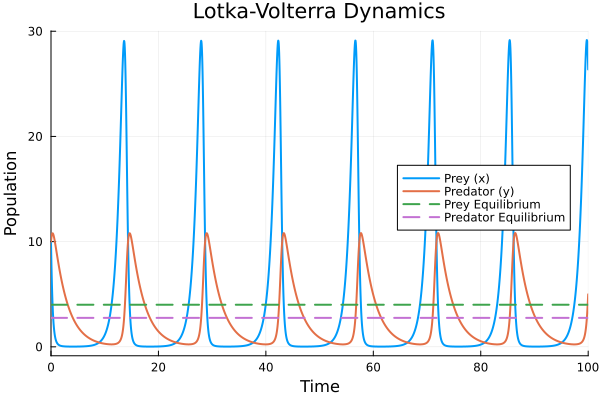

In [7]:
p1 = plot(ODESol, xlabel="Time", ylabel="Population", 
          title="Lotka-Volterra Dynamics",
          label=["Prey (x)" "Predator (y)"],
          lw=2, legend=:right)
eq = nonLinearSol.u
println("Equilibrium: ", nonLinearSol.u)
hline!([eq[1]], label="Prey Equilibrium", linestyle=:dash, lw=2)
hline!([eq[2]], label="Predator Equilibrium", linestyle=:dash, lw=2)
plot(p1)

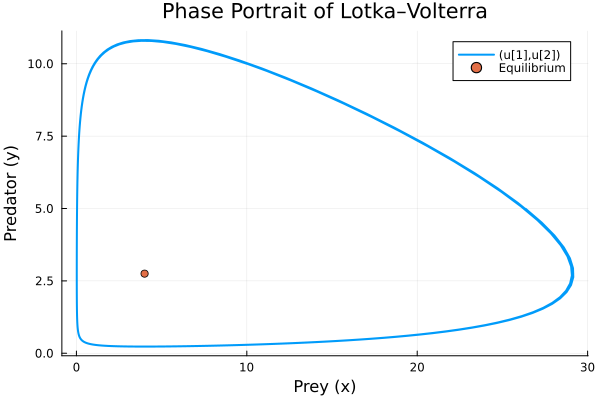

In [10]:
plot(ODESol, idxs=(1,2),
     xlabel="Prey (x)", ylabel="Predator (y)",
     title="Phase Portrait of Lotka–Volterra",
     lw=2)
scatter!([eq[1]], [eq[2]], label="Equilibrium", markersize=4)